In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
# from sklearn.cluster import OPTICS
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
df = pd.read_csv('Fifa_Soccer_data.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [5]:
fifa = df[['Name','Age','Nationality','Height','Weight','Overall','Potential','Balance','Stamina','Strength','Dribbling','ShotPower','Jumping','Acceleration','Work Rate']]
fifa

,Name,Age,Nationality,Height,Weight,Overall,Potential,Balance,Stamina,Strength,Dribbling,ShotPower,Jumping,Acceleration,Work Rate
0,L. Messi,31,Argentina,5'7,159lbs,94,94,95.0,72.0,59.0,97.0,85.0,68.0,91.0,Medium/ Medium
1,Cristiano Ronaldo,33,Portugal,6'2,183lbs,94,94,70.0,88.0,79.0,88.0,95.0,95.0,89.0,High/ Low
2,Neymar Jr,26,Brazil,5'9,150lbs,92,93,84.0,81.0,49.0,96.0,80.0,61.0,94.0,High/ Medium
3,De Gea,27,Spain,6'4,168lbs,91,93,43.0,43.0,64.0,18.0,31.0,67.0,57.0,Medium/ Medium
4,K. De Bruyne,27,Belgium,5'11,154lbs,91,92,77.0,90.0,75.0,86.0,91.0,63.0,78.0,High/ High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,5'9,134lbs,47,65,76.0,40.0,47.0,42.0,43.0,55.0,54.0,Medium/ Medium
18203,N. Christoffersson,19,Sweden,6'3,170lbs,47,63,52.0,43.0,67.0,39.0,41.0,47.0,41.0,Medium/ Medium
18204,B. Worman,16,England,5'8,148lbs,47,67,58.0,55.0,32.0,45.0,45.0,60.0,70.0,Medium/ Medium
18205,D. Walker-Rice,17,England,5'10,154lbs,47,66,71.0,40.0,48.0,51.0,64.0,42.0,61.0,Medium/ Medium


In [6]:
#to see all the colums
#pd.set_option('display.max_columns',None)
#fifa.head()

In [7]:
# Deleting those rows which has null
Fifa = fifa.dropna()

In [8]:
t =Fifa['Work Rate'].unique()
t

array(['Medium/ Medium', 'High/ Low', 'High/ Medium', 'High/ High',
       'Medium/ High', 'Medium/ Low', 'Low/ High', 'Low/ Medium',
       'Low/ Low'], dtype=object)

In [9]:
#observe nationality of the players
#df['Nationality'].value_counts()

In [10]:
# Observing the columns of the dataframe
#fifa[['Nationality']].value_counts()[0:50]

In [11]:
Fifa

,Name,Age,Nationality,Height,Weight,Overall,Potential,Balance,Stamina,Strength,Dribbling,ShotPower,Jumping,Acceleration,Work Rate
0,L. Messi,31,Argentina,5'7,159lbs,94,94,95.0,72.0,59.0,97.0,85.0,68.0,91.0,Medium/ Medium
1,Cristiano Ronaldo,33,Portugal,6'2,183lbs,94,94,70.0,88.0,79.0,88.0,95.0,95.0,89.0,High/ Low
2,Neymar Jr,26,Brazil,5'9,150lbs,92,93,84.0,81.0,49.0,96.0,80.0,61.0,94.0,High/ Medium
3,De Gea,27,Spain,6'4,168lbs,91,93,43.0,43.0,64.0,18.0,31.0,67.0,57.0,Medium/ Medium
4,K. De Bruyne,27,Belgium,5'11,154lbs,91,92,77.0,90.0,75.0,86.0,91.0,63.0,78.0,High/ High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,5'9,134lbs,47,65,76.0,40.0,47.0,42.0,43.0,55.0,54.0,Medium/ Medium
18203,N. Christoffersson,19,Sweden,6'3,170lbs,47,63,52.0,43.0,67.0,39.0,41.0,47.0,41.0,Medium/ Medium
18204,B. Worman,16,England,5'8,148lbs,47,67,58.0,55.0,32.0,45.0,45.0,60.0,70.0,Medium/ Medium
18205,D. Walker-Rice,17,England,5'10,154lbs,47,66,71.0,40.0,48.0,51.0,64.0,42.0,61.0,Medium/ Medium


In [12]:
#Remove unit measure 'lb' from the column "Weight"
Fifa['Weight'] = Fifa['Weight'].str.replace(r'\D','')


<ipython-input-12-7ec01b37a604>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fifa['Weight'] = Fifa['Weight'].str.replace(r'\D','')


In [13]:
Fifa['Work Rate'].unique()

array(['Medium/ Medium', 'High/ Low', 'High/ Medium', 'High/ High',
       'Medium/ High', 'Medium/ Low', 'Low/ High', 'Low/ Medium',
       'Low/ Low'], dtype=object)

In [14]:
w = Fifa['Work Rate'].apply(lambda x: pd.Series(str(x).split("/")))  # splitting the column 'Workrate into two column'
w =w.rename(columns = {0:'WR1',1:'WR2'})     #Renaming the two splitted columns


In [15]:
mapping = {' Low':1,' Medium':2,' High':3,'Medium':2,'Low':1,'High':3}
#t = lambda s: s**2
#w.replace({'MR1':mapping,'MR2':mapping,"MR3":mapping})
w = w.applymap(lambda s: mapping.get(s) if s in mapping  else s)
#w = w.applymap(lambda s: mapping.get(s))
#w = w.applymap(t)
w

,WR1,WR2
0,2,2
1,3,1
2,3,2
3,2,2
4,3,3
...,...,...
18202,2,2
18203,2,2
18204,2,2
18205,2,2


In [16]:
# adding the WR1 and WR2 as the columns of the dataset Fifa
Fifa['WR1'] = w['WR1']
Fifa['WR2'] = w['WR2']

<ipython-input-16-165e6c5abb6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fifa['WR1'] = w['WR1']
<ipython-input-16-165e6c5abb6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fifa['WR2'] = w['WR2']


In [17]:
# adding a colum of mean of column WR1 and WR2
Fifa['WR'] = (w['WR1'] +w['WR2'])/2
Fifa

<ipython-input-17-843afb866475>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fifa['WR'] = (w['WR1'] +w['WR2'])/2


,Name,Age,Nationality,Height,Weight,Overall,Potential,Balance,Stamina,Strength,Dribbling,ShotPower,Jumping,Acceleration,Work Rate,WR1,WR2,WR
0,L. Messi,31,Argentina,5'7,159,94,94,95.0,72.0,59.0,97.0,85.0,68.0,91.0,Medium/ Medium,2,2,2.0
1,Cristiano Ronaldo,33,Portugal,6'2,183,94,94,70.0,88.0,79.0,88.0,95.0,95.0,89.0,High/ Low,3,1,2.0
2,Neymar Jr,26,Brazil,5'9,150,92,93,84.0,81.0,49.0,96.0,80.0,61.0,94.0,High/ Medium,3,2,2.5
3,De Gea,27,Spain,6'4,168,91,93,43.0,43.0,64.0,18.0,31.0,67.0,57.0,Medium/ Medium,2,2,2.0
4,K. De Bruyne,27,Belgium,5'11,154,91,92,77.0,90.0,75.0,86.0,91.0,63.0,78.0,High/ High,3,3,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,5'9,134,47,65,76.0,40.0,47.0,42.0,43.0,55.0,54.0,Medium/ Medium,2,2,2.0
18203,N. Christoffersson,19,Sweden,6'3,170,47,63,52.0,43.0,67.0,39.0,41.0,47.0,41.0,Medium/ Medium,2,2,2.0
18204,B. Worman,16,England,5'8,148,47,67,58.0,55.0,32.0,45.0,45.0,60.0,70.0,Medium/ Medium,2,2,2.0
18205,D. Walker-Rice,17,England,5'10,154,47,66,71.0,40.0,48.0,51.0,64.0,42.0,61.0,Medium/ Medium,2,2,2.0


In [18]:
#splitting the feet and inches from the column Heighe
t = Fifa['Height'].apply(lambda x: pd.Series(str(x).split("'")))
t = t.rename(columns = {0:'feet',1:'inches'})
t

,feet,inches
0,5,7
1,6,2
2,5,9
3,6,4
4,5,11
...,...,...
18202,5,9
18203,6,3
18204,5,8
18205,5,10


In [19]:
#cchanginh object to numerics to find mean and mean is appending on the data frame as a last column.
i = pd.to_numeric(t['feet'])*12+ pd.to_numeric(t['inches'])
Fifa['Height'] = i
Fifa


<ipython-input-19-bea79b0d5950>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fifa['Height'] = i


,Name,Age,Nationality,Height,Weight,Overall,Potential,Balance,Stamina,Strength,Dribbling,ShotPower,Jumping,Acceleration,Work Rate,WR1,WR2,WR
0,L. Messi,31,Argentina,67,159,94,94,95.0,72.0,59.0,97.0,85.0,68.0,91.0,Medium/ Medium,2,2,2.0
1,Cristiano Ronaldo,33,Portugal,74,183,94,94,70.0,88.0,79.0,88.0,95.0,95.0,89.0,High/ Low,3,1,2.0
2,Neymar Jr,26,Brazil,69,150,92,93,84.0,81.0,49.0,96.0,80.0,61.0,94.0,High/ Medium,3,2,2.5
3,De Gea,27,Spain,76,168,91,93,43.0,43.0,64.0,18.0,31.0,67.0,57.0,Medium/ Medium,2,2,2.0
4,K. De Bruyne,27,Belgium,71,154,91,92,77.0,90.0,75.0,86.0,91.0,63.0,78.0,High/ High,3,3,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,69,134,47,65,76.0,40.0,47.0,42.0,43.0,55.0,54.0,Medium/ Medium,2,2,2.0
18203,N. Christoffersson,19,Sweden,75,170,47,63,52.0,43.0,67.0,39.0,41.0,47.0,41.0,Medium/ Medium,2,2,2.0
18204,B. Worman,16,England,68,148,47,67,58.0,55.0,32.0,45.0,45.0,60.0,70.0,Medium/ Medium,2,2,2.0
18205,D. Walker-Rice,17,England,70,154,47,66,71.0,40.0,48.0,51.0,64.0,42.0,61.0,Medium/ Medium,2,2,2.0


### Normalizing the every Features using StandardScalser(z-score)

In [20]:
scaler = StandardScaler()
Fifa['Height']=scaler.fit(Fifa[['Height']]).transform(Fifa[['Height']])
Fifa['Weight']=scaler.fit(Fifa[['Weight']]).transform(Fifa[['Weight']])
Fifa['Age']=scaler.fit(Fifa[['Age']]).transform(Fifa[['Age']])
Fifa['Overall']=scaler.fit(Fifa[['Overall']]).transform(Fifa[['Overall']])
Fifa['Potential']=scaler.fit(Fifa[['Potential']]).transform(Fifa[['Potential']])
Fifa['Balance']=scaler.fit(Fifa[['Balance']]).transform(Fifa[['Balance']])
Fifa['Stamina']=scaler.fit(Fifa[['Stamina']]).transform(Fifa[['Stamina']])
Fifa['Strength']=scaler.fit(Fifa[['Strength']]).transform(Fifa[['Strength']])
Fifa['Dribbling']=scaler.fit(Fifa[['Dribbling']]).transform(Fifa[['Dribbling']])
Fifa['ShotPower']=scaler.fit(Fifa[['ShotPower']]).transform(Fifa[['ShotPower']])
Fifa['Acceleration']=scaler.fit(Fifa[['Acceleration']]).transform(Fifa[['Acceleration']])
Fifa['Jumping']=scaler.fit(Fifa[['Jumping']]).transform(Fifa[['Jumping']])
Fifa['WR1']=scaler.fit(Fifa[['WR1']]).transform(Fifa[['WR1']])
Fifa['WR2']=scaler.fit(Fifa[['WR2']]).transform(Fifa[['WR2']])
Fifa['WR']=scaler.fit(Fifa[['WR']]).transform(Fifa[['WR']])
Fifa.head()

<ipython-input-20-0bfbfa35d914>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fifa['Height']=scaler.fit(Fifa[['Height']]).transform(Fifa[['Height']])
<ipython-input-20-0bfbfa35d914>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fifa['Weight']=scaler.fit(Fifa[['Weight']]).transform(Fifa[['Weight']])
<ipython-input-20-0bfbfa35d914>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,Name,Age,Nationality,Height,Weight,Overall,Potential,Balance,Stamina,Strength,Dribbling,ShotPower,Jumping,Acceleration,Work Rate,WR1,WR2,WR
0,L. Messi,1.258441,Argentina,-1.646010,-0.447583,4.013364,3.697415,2.195382,0.552403,-0.502679,2.201445,1.713704,0.246247,1.767621,Medium/ Medium,-0.418496,-0.170930,-0.440246
1,Cristiano Ronaldo,1.686666,Portugal,0.995907,1.091577,4.013364,3.697415,0.426820,1.559053,1.090102,1.725503,2.293836,2.530565,1.633639,High/ Low,1.498141,-2.159343,-0.440246
2,Neymar Jr,0.187878,Brazil,-0.891177,-1.024769,3.724114,3.534396,1.417214,1.118643,-1.299069,2.148563,1.423639,-0.345984,1.968594,High/ Medium,1.498141,-0.170930,1.006448
3,De Gea,0.401990,Spain,1.750741,0.129602,3.579489,3.534396,-1.483228,-1.272151,-0.104484,-1.976272,-1.419003,0.161642,-0.510075,Medium/ Medium,-0.418496,-0.170930,-0.440246
4,K. De Bruyne,0.401990,Belgium,-0.136343,-0.768242,3.579489,3.371377,0.922017,1.684884,0.771546,1.619738,2.061783,-0.176775,0.896737,High/ High,1.498141,1.817483,2.453143


In [21]:
#Dropping The Column Work Rate
Fifa.drop(['Work Rate'],axis=1)

,Name,Age,Nationality,Height,Weight,Overall,Potential,Balance,Stamina,Strength,Dribbling,ShotPower,Jumping,Acceleration,WR1,WR2,WR
0,L. Messi,1.258441,Argentina,-1.646010,-0.447583,4.013364,3.697415,2.195382,0.552403,-0.502679,2.201445,1.713704,0.246247,1.767621,-0.418496,-0.170930,-0.440246
1,Cristiano Ronaldo,1.686666,Portugal,0.995907,1.091577,4.013364,3.697415,0.426820,1.559053,1.090102,1.725503,2.293836,2.530565,1.633639,1.498141,-2.159343,-0.440246
2,Neymar Jr,0.187878,Brazil,-0.891177,-1.024769,3.724114,3.534396,1.417214,1.118643,-1.299069,2.148563,1.423639,-0.345984,1.968594,1.498141,-0.170930,1.006448
3,De Gea,0.401990,Spain,1.750741,0.129602,3.579489,3.534396,-1.483228,-1.272151,-0.104484,-1.976272,-1.419003,0.161642,-0.510075,-0.418496,-0.170930,-0.440246
4,K. De Bruyne,0.401990,Belgium,-0.136343,-0.768242,3.579489,3.371377,0.922017,1.684884,0.771546,1.619738,2.061783,-0.176775,0.896737,1.498141,1.817483,2.453143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,-1.310911,England,-0.891177,-2.050876,-2.784022,-1.030138,0.851275,-1.460897,-1.458348,-0.707092,-0.722846,-0.853610,-0.711048,-0.418496,-0.170930,-0.440246
18203,N. Christoffersson,-1.310911,Sweden,1.373324,0.257865,-2.784022,-1.356176,-0.846545,-1.272151,0.134433,-0.865739,-0.838872,-1.530445,-1.581932,-0.418496,-0.170930,-0.440246
18204,B. Worman,-1.953248,England,-1.268593,-1.153032,-2.784022,-0.704100,-0.422090,-0.517163,-2.652933,-0.548444,-0.606820,-0.430588,0.360809,-0.418496,-0.170930,-0.440246
18205,D. Walker-Rice,-1.739136,England,-0.513760,-0.768242,-2.784022,-0.867119,0.497562,-1.460897,-1.378709,-0.231149,0.495429,-1.953467,-0.242111,-0.418496,-0.170930,-0.440246


In [23]:
#Fifa.loc[Fifa.Overall > 2] = 1
#Fifa.loc[(Fifa.Overall > -1.5) & (Fifa.Overall <2)] = 2
#Fifa.loc[Fifa.Overall < -1.5] = 3
for f in Fifa['Overall']:
    if f > 2:
        Fifa['Overall'].replace(f, 'High', inplace=True)
    elif f < -1.5:
        Fifa['Overall'].replace(f, 'Low', inplace=True)
    else:
        Fifa['Overall'].replace(f, 'Average', inplace=True)
        

C:\Users\dpdulal\Anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [24]:
Fifa = Fifa.drop(['WR1','WR2','Work Rate'], axis = 1)

In [25]:
Fifa.head()

,Name,Age,Nationality,Height,Weight,Overall,Potential,Balance,Stamina,Strength,Dribbling,ShotPower,Jumping,Acceleration,WR
0,L. Messi,1.258441,Argentina,-1.646010,-0.447583,High,3.697415,2.195382,0.552403,-0.502679,2.201445,1.713704,0.246247,1.767621,-0.440246
1,Cristiano Ronaldo,1.686666,Portugal,0.995907,1.091577,High,3.697415,0.426820,1.559053,1.090102,1.725503,2.293836,2.530565,1.633639,-0.440246
2,Neymar Jr,0.187878,Brazil,-0.891177,-1.024769,High,3.534396,1.417214,1.118643,-1.299069,2.148563,1.423639,-0.345984,1.968594,1.006448
3,De Gea,0.401990,Spain,1.750741,0.129602,High,3.534396,-1.483228,-1.272151,-0.104484,-1.976272,-1.419003,0.161642,-0.510075,-0.440246
4,K. De Bruyne,0.401990,Belgium,-0.136343,-0.768242,High,3.371377,0.922017,1.684884,0.771546,1.619738,2.061783,-0.176775,0.896737,2.453143


In [ ]:
# Now change a,b,c to 1,2,3
#Fifa['Overall'].replace('a', 1, inplace=True)
#Fifa['Overall'].replace('b', 2, inplace=True)
#Fifa['Overall'].replace('c', 3, inplace=True)

### Some Data Visualization

Text(0.5, 1.0, 'Bar Diagram of Number of Player from Top 50 Nationals')

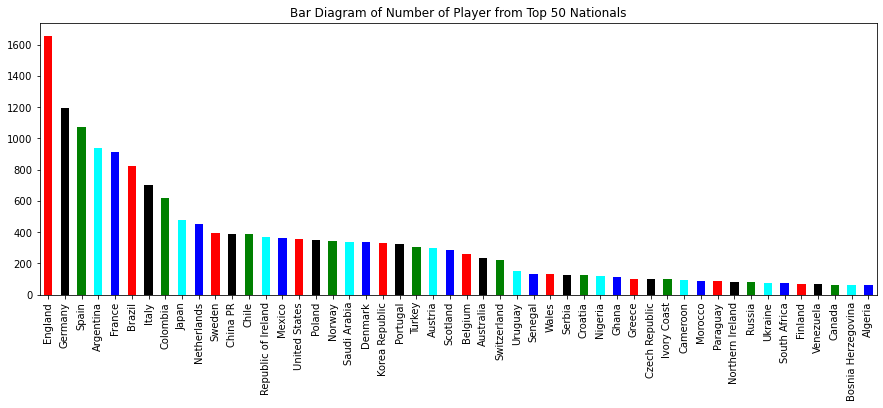

In [29]:
#plt.figure(figsize=(22,14))
#plt.bar(list(Fifa['Nationality'].value_counts()[0:20].keys()),list(Fifa['Nationality'].value_counts()[0:20]))
Fifa['Nationality'].value_counts().head(50).plot(kind = 'bar',figsize=[15,5],color = ['red','black','green','cyan','blue'])
plt.title('Bar Diagram of Number of Player from Top 50 Nationals')

In [26]:
#Correlation coefficent between age and strength
C = np.corrcoef(Fifa.Age,Fifa.Strength)
C

array([[1.        , 0.33279819],
       [0.33279819, 1.        ]])

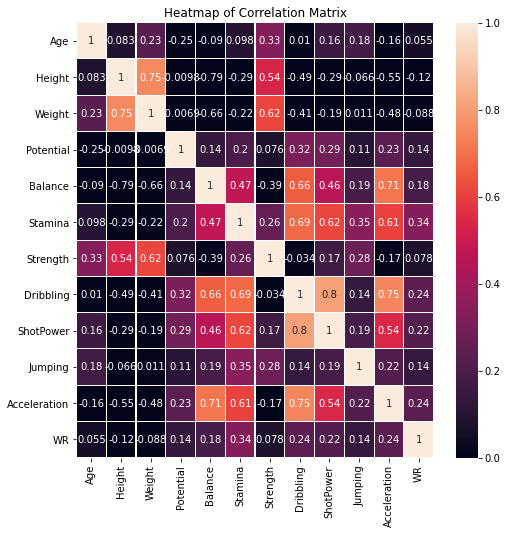

In [31]:
# correlation matrix of Age,Stamina Balance Strength
df_small = Fifa.iloc[:,[1,3,4,5,6,7,8,9,10,11,12,13,14]]

correlation_mat = df_small.corr()
fig , ax = plt.subplots(figsize=(8,8))

sns.heatmap(correlation_mat, annot = True, vmax = 1,vmin = 0, linewidth = 0.1,ax = ax)
plt.title('Heatmap of Correlation Matrix')

plt.show()

###### From the above heat map we found the interesting correlations between different features. First, There high positive correlation between Dribbling and shot Power of the plaers(0.8), similarly between Jumping and Dribbling , Stamina and Jumping, Accleration and Dribbling etc.  are highly correlated in positive mannar, whereas, Balance and Weight  have high negative correlation. In addition, Weight and Potential , Height and age, Height and Potential, Balance and Age are are almost not corrrelated. 

## Classification Using LogisticRegression 

In [34]:
#necessary Library
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [35]:
#selection of intependent variable and target variable
X = Fifa.iloc[:,[1,3,4,6,7,8,9,10,11,12,13,14]].values
y = Fifa.iloc[:,5].values

In [36]:
#split the features for training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

In [37]:
#model execution
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [38]:
#predicion projection
y_pred = classifier.predict(X_test)


In [39]:
from sklearn.metrics import f1_score

print('Accuracy is :',accuracy_score(y_test,y_pred))
print('F-1 score: ',f1_score(y_test, y_pred, average='macro'))

Accuracy is : 0.9616740088105726
F-1 score:  0.8410684449218283


In [40]:
predictions = classifier.predict(X_test)

In [41]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n     Average       0.97      0.98      0.98      4154\n        High       0.83      0.76      0.80       102\n         Low       0.80      0.70      0.75       284\n\n    accuracy                           0.96      4540\n   macro avg       0.87      0.82      0.84      4540\nweighted avg       0.96      0.96      0.96      4540\n'

In [42]:

confusion_matrix(y_test,predictions)

array([[4089,   16,   49],
       [  24,   78,    0],
       [  85,    0,  199]], dtype=int64)

[[4089   16   49]
 [  24   78    0]
 [  85    0  199]]


<Figure size 1440x1440 with 0 Axes>

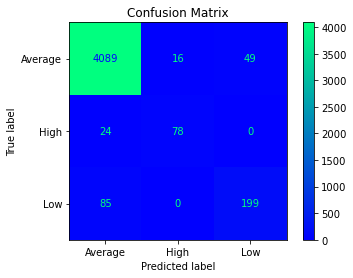

In [43]:
plt.figure(figsize = (20,20))
disp = plot_confusion_matrix(classifier,X_test,y_test,cmap = plt.cm.winter)
print(disp.confusion_matrix)
plt.title('Confusion Matrix')
plt.show()

# Classification Using DecisionTreeClassifier

In [ ]:
#Import Library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
#model execution
model = DecisionTreeClassifier(max_depth = 6)
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
#test Acuracy
print('Accuracy is :',accuracy_score(y_test,y_pred))
print('F-1 score: ',f1_score(y_test, y_pred, average='macro'))

In [ ]:


#plot Decision Tree
tree.plot_tree(model,filled = True, fontsize = 6);
plt.title('Decision Tree')

from sklearn.metrics import classification_report

target_names = ['Average','High', 'Low']

print(classification_report(y_test,y_pred, target_names=target_names))

In [ ]:

disp = plot_confusion_matrix(model,X_test,y_test,cmap = plt.cm.summer)
print(disp.confusion_matrix)
plt.title('Confusion Matrix')
plt.show()

# Using KNeighbors Classifier

In [79]:
#import Library
from sklearn.neighbors import KNeighborsClassifier

In [80]:
knmodel = KNeighborsClassifier(n_neighbors = 6)
knmodel = knmodel.fit(X_train,y_train)
y_pred = knmodel.predict(X_test)

In [81]:
#test accuracy
print('Accuracy is :',accuracy_score(y_test,y_pred))
print('F-1 score: ',f1_score(y_test, y_pred, average='macro'))

Accuracy is : 0.9409691629955947
F-1 score:  0.6424406185919344


[[4122    1   31]
 [  77   25    0]
 [ 159    0  125]]


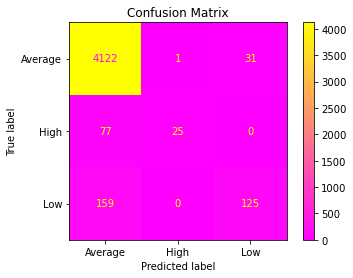

In [82]:
disp = plot_confusion_matrix(knmodel,X_test,y_test,cmap = plt.cm.spring )
print(disp.confusion_matrix)
plt.title('Confusion Matrix')
plt.show()

# Naive Bayesian Classification

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nbmodel = GaussianNB()
nbmodel = nbmodel.fit(X_train,y_train)
y_pred = nbmodel.predict(X_test)

In [ ]:
# Test Accuracy
print('Accuracy is :',accuracy_score(y_test,y_pred))
print('F-1 score: ',f1_score(y_test, y_pred, average='macro'))

In [ ]:
disp = plot_confusion_matrix(nbmodel,X_test,y_test,cmap = plt.cm.autumn )
print(disp.confusion_matrix)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#colors = [plt.cm.winter,plt.cm.summer,plt.cm.spring,plt.cm.autumn]
#models = [LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB()]
#for mds in models:
   # mds.fit(X_train,y_train)

In [ ]:
#fig,axes = plt.subplots(nrows = 2,ncols = 2, figsize = (14,10))
#for mds,ax,j in zip(models,axes.flatten(),colors):
    #plot_confusion_matrix(mds,X_test,y_test,ax = ax, cmap = j)
   # ax.title.set_text(type(mds).__name__)
#plt.tight_layout()
#plt.show()
    

# Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)
print('accuracy',accuracy_score(y_test,y_pred))
print('F-1 score: ',f1_score(y_test, y_pred, average='macro'))

accuracy 0.9682819383259912
F-1 score:  0.8721890433802993


[[4111   11   32]
 [  17   85    0]
 [  84    0  200]]


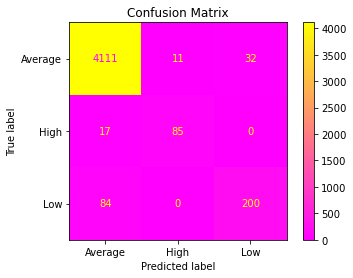

In [62]:

disp = plot_confusion_matrix(rf_clf,X_test,y_test,cmap = plt.cm.spring )
print(disp.confusion_matrix)
plt.title('Confusion Matrix')
plt.show()

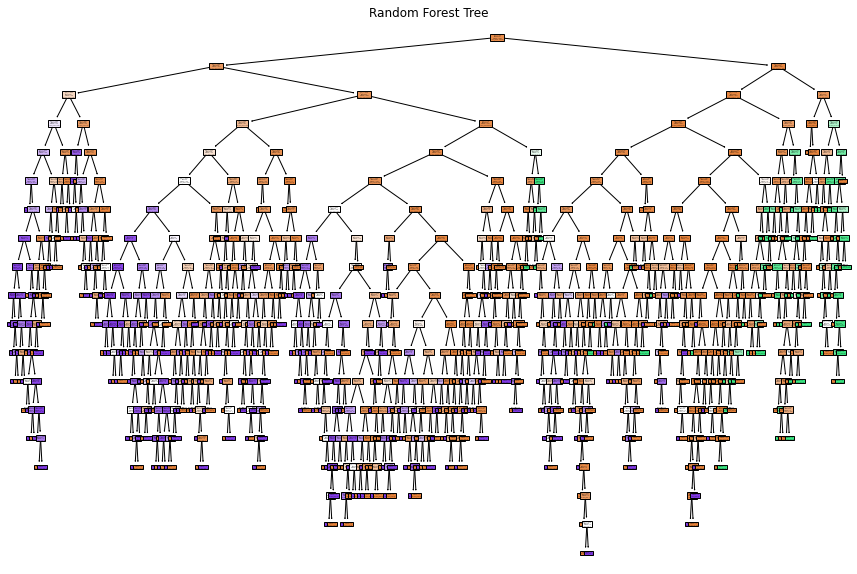

In [64]:
#Visualization of Random Forest Tree
from sklearn import tree
plt.figure(figsize = (15,10))
for i in range(len(rf_clf.estimators_)):
    tree.plot_tree(rf_clf.estimators_[i],filled=True)
    plt.title('Random Forest Tree')

# Support Vector Classification

accuracy 0.9671806167400882
F-1 score:  0.8618100892042503
[[4111    6   37]
 [  26   76    0]
 [  80    0  204]]


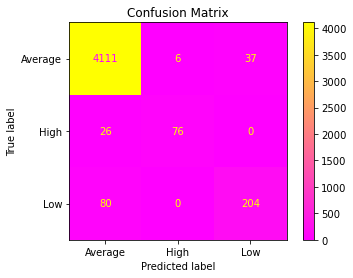

In [44]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print('accuracy',accuracy_score(y_test,y_pred))
print('F-1 score: ',f1_score(y_test, y_pred, average='macro'))
disp = plot_confusion_matrix(svc,X_test,y_test,cmap = plt.cm.spring )
print(disp.confusion_matrix)
plt.title('Confusion Matrix')
plt.show()

# ADA BOOST Classification

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier()
ada_boost_clf.fit(X_train,y_train)
y_pred = ada_boost_clf.predict(X_test)
print('accuracy',accuracy_score(y_test,y_pred))
print('F-1 score: ',f1_score(y_test, y_pred, average='macro'))

In [ ]:
disp = plot_confusion_matrix(ada_boost_clf,X_test,y_test,cmap = plt.cm.spring )
print(disp.confusion_matrix)
plt.title('Confusion Matrix')           
plt.show()

# Stochastic Gradient Descent Classification

In [ ]:
from sklearn.linear_model import SGDClassifier

sdg_clf = SGDClassifier(loss="hinge", penalty="l2")
sdg_clf.fit(X_train,y_train)
y_pred = sdg_clf.predict(X_test)
print('accuracy',accuracy_score(y_test,y_pred))
print('F-1 score: ',f1_score(y_test, y_pred, average='macro'))

In [ ]:
disp = plot_confusion_matrix(ada_boost_clf,X_test,y_test,cmap = plt.cm.spring )
print(disp.confusion_matrix)
plt.title('Confusion Matrix')           
plt.show()

# Compare and contrast

In [ ]:
colors = [plt.cm.winter,plt.cm.summer,plt.cm.spring,plt.cm.autumn,plt.cm.cool,plt.cm.Purples,plt.cm.Blues,plt.cm.gray]
models = [LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB(),RandomForestClassifier(),SVC(),AdaBoostClassifier(), SGDClassifier()]
for mds in models:
    mds.fit(X_train,y_train)

In [ ]:
fig,axes = plt.subplots(nrows = 2,ncols = 4, figsize = (14,10))
for mds,ax,j in zip(models,axes.flatten(),colors):
    plot_confusion_matrix(mds,X_test,y_test,ax = ax, cmap = j)
    ax.title.set_text(type(mds).__name__)
plt.tight_layout()
plt.show()
print(models)